# Import data

In [8]:
import pandas as pd
data = pd.read_csv('Data/BBCA Davin.csv')


In [9]:
# # set max row to display
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 1000)

data

,title,category,publish_date,article_url
0,IHSG Hari Ini Diprediksi Melemah di Level 7.20...,detikFinance,"Kamis, 28 Nov 2024 08:51 WIB",https://finance.detik.com/market-research/d-76...
1,IHSG Hari Ini Diramal Bergerak di Level 7.100-...,detikFinance,"Selasa, 19 Nov 2024 08:49 WIB",https://finance.detik.com/bursa-dan-valas/d-76...
2,Berapa Harga Saham BBCA Hari Ini?,detikFinance,"Senin, 11 Nov 2024 12:45 WIB",https://finance.detik.com/bursa-dan-valas/d-76...
3,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...,detikFinance,"Selasa, 29 Okt 2024 08:30 WIB",https://finance.detik.com/bursa-dan-valas/d-76...
4,BCA Pemberi Utang Terbesar ke Sritex Respons s...,detikFinance,"Selasa, 29 Okt 2024 07:45 WIB",https://finance.detik.com/moneter/d-7611188/bc...
...,...,...,...,...
306,OSO Securities: IHSG Berpeluang Menguat di Kis...,detikFinance,"Selasa, 08 Jan 2019 08:50 WIB",https://finance.detik.com/market-research/d-43...
307,Jeda Siang IHSG Bergerak Positif ke 6.328,detikFinance,"Senin, 07 Jan 2019 12:35 WIB",https://finance.detik.com/bursa-dan-valas/d-43...
308,Asing Ikut Danai Proyek Tol Cipali yang Disebu...,detikFinance,"Kamis, 03 Jan 2019 14:24 WIB",https://finance.detik.com/infrastruktur/d-4369...
309,IHSG Lanjutkan Penguatan ke 6.197,detikFinance,"Kamis, 03 Jan 2019 12:21 WIB",https://finance.detik.com/bursa-dan-valas/d-43...


In [10]:
# buat plot dari data publish_date every week
import matplotlib.pyplot as plt


In [11]:
# Define a mapping for Indonesian weekdays and months to English equivalents
indonesian_weekdays = {
    "Senin": "Monday", "Selasa": "Tuesday", "Rabu": "Wednesday",
    "Kamis": "Thursday", "Jumat": "Friday", "Sabtu": "Saturday", "Minggu": "Sunday"
}
indonesian_months = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr", "Mei": "May",
    "Jun": "Jun", "Jul": "Jul", "Agu": "Aug", "Sep": "Sep", "Okt": "Oct",
    "Nov": "Nov", "Des": "Dec"
}

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    data['publish_date'] = data['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    data['publish_date'] = data['publish_date'].str.replace(indo_month, eng_month, regex=False)


In [12]:

# Convert publish_date to datetime
data['publish_date'] = pd.to_datetime(data['publish_date'], format='%A, %d %b %Y %H:%M WIB', errors='coerce')


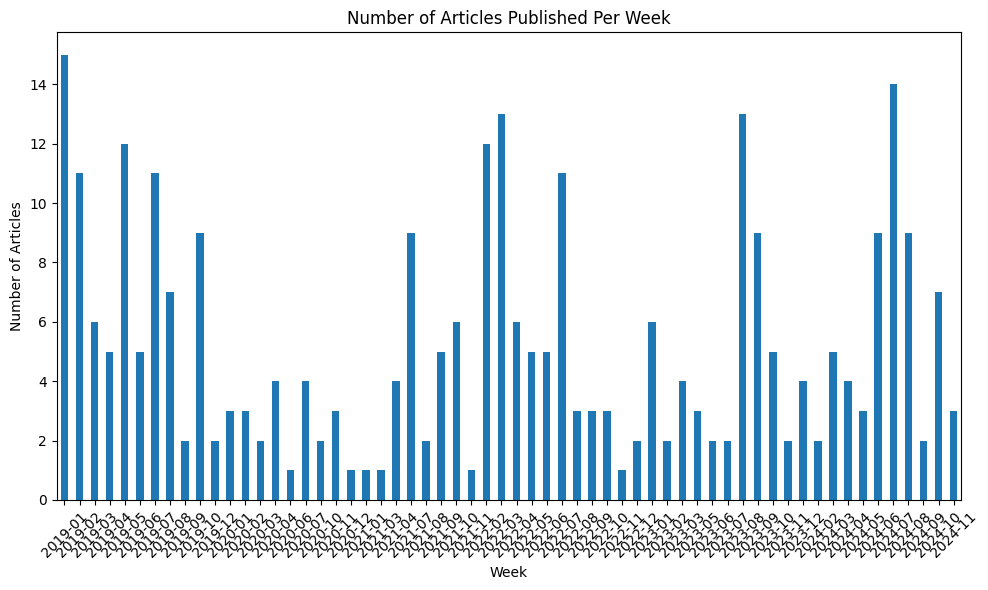

In [13]:

# Group by week and count the articles
weekly_counts = data['publish_date'].dt.to_period('M').value_counts().sort_index()

# Plotting weekly data
plt.figure(figsize=(10, 6))
weekly_counts.plot(kind='bar')
plt.title("Number of Articles Published Per Week")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
mei_2022_data = data[(data['publish_date'].dt.year == 2024) & (data['publish_date'].dt.month == 6)]
pd.set_option('display.max_colwidth', None)

mei_2022_data['title']

35                                  Awal Pekan IHSG Dibuka di Zona Hijau
36                   Usai Libur Panjang IHSG Hari Ini Diprediksi Melemah
37      Top! Jumlah Investor BBRI Naik Signifikan dalam 4 Bulan Terakhir
38    Ada 'Diskon' Harga Saham Jumlah Investor BBRI Tembus Setengah Juta
39                     IHSG Dibuka di Zona Hijau Diramal Mantul Hari Ini
40                  IHSG Rabu Pagi Bergerak ke Zona Merah di Level 6.851
41                                 Awal Pekan IHSG Dibuka ke Level 6.897
42                          IHSG Ditutup Melemah Tinggalkan Level 7.000!
43              IHSG Dibuka Menguat tapi Tak Lama Melempem ke Zona Merah
Name: title, dtype: object

# Translate

In [15]:
data.drop(columns=['article_url'], inplace=True)

In [16]:
data

,title,category,publish_date
0,IHSG Hari Ini Diprediksi Melemah di Level 7.200-7.300,detikFinance,2024-11-28 08:51:00
1,IHSG Hari Ini Diramal Bergerak di Level 7.100-7.200,detikFinance,2024-11-19 08:49:00
2,Berapa Harga Saham BBCA Hari Ini?,detikFinance,2024-11-11 12:45:00
3,Masuk Daftar 45 Saham Pre-opening Saham GOTO Makin Likuid?,detikFinance,2024-10-29 08:30:00
4,BCA Pemberi Utang Terbesar ke Sritex Respons soal Kondisi Pailit,detikFinance,2024-10-29 07:45:00
...,...,...,...
306,OSO Securities: IHSG Berpeluang Menguat di Kisaran 6.317,detikFinance,2019-01-08 08:50:00
307,Jeda Siang IHSG Bergerak Positif ke 6.328,detikFinance,2019-01-07 12:35:00
308,Asing Ikut Danai Proyek Tol Cipali yang Disebut Sandi Tanpa Utang,detikFinance,2019-01-03 14:24:00
309,IHSG Lanjutkan Penguatan ke 6.197,detikFinance,2019-01-03 12:21:00


In [ ]:
# %pip install deep_translator

In [17]:
from deep_translator import GoogleTranslator
import pandas as pd

df = data.copy()

# Penerjemah Deep Translator
translator = GoogleTranslator(source='id', target='en')

# Menerjemahkan Kolom
df['title_en'] = df['title'].apply(lambda x: translator.translate(x))


In [18]:
df

,title,category,publish_date,title_en
0,IHSG Hari Ini Diprediksi Melemah di Level 7.200-7.300,detikFinance,2024-11-28 08:51:00,"IHSG Today Predicted to Weaken at Level 7,200-7,300"
1,IHSG Hari Ini Diramal Bergerak di Level 7.100-7.200,detikFinance,2024-11-19 08:49:00,"IHSG Today Predicted to Move at Level 7,100-7,200"
2,Berapa Harga Saham BBCA Hari Ini?,detikFinance,2024-11-11 12:45:00,What is the Price of BBCA Shares Today?
3,Masuk Daftar 45 Saham Pre-opening Saham GOTO Makin Likuid?,detikFinance,2024-10-29 08:30:00,Enter the List of 45 Pre-opening Stocks Are GOTO Stocks Increasingly Liquid?
4,BCA Pemberi Utang Terbesar ke Sritex Respons soal Kondisi Pailit,detikFinance,2024-10-29 07:45:00,"BCA, Sritex's Largest Lender, Responds to Bankruptcy"
...,...,...,...,...
306,OSO Securities: IHSG Berpeluang Menguat di Kisaran 6.317,detikFinance,2019-01-08 08:50:00,"OSO Securities: IHSG Has Opportunity to Strengthen in the Range of 6,317"
307,Jeda Siang IHSG Bergerak Positif ke 6.328,detikFinance,2019-01-07 12:35:00,"IHSG Afternoon Break Moves Positively to 6,328"
308,Asing Ikut Danai Proyek Tol Cipali yang Disebut Sandi Tanpa Utang,detikFinance,2019-01-03 14:24:00,Foreigners Participate in Funding Cipali Toll Project That Sandi Says is Debt-Free
309,IHSG Lanjutkan Penguatan ke 6.197,detikFinance,2019-01-03 12:21:00,"IHSG Continues Strengthening to 6,197"


# Processing

In [19]:
# stopword removal title_en
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english'))

df['title_en_stopwords_removed'] = df['title_en'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [21]:
df

,title,category,publish_date,title_en,title_en_stopwords_removed
0,IHSG Hari Ini Diprediksi Melemah di Level 7.200-7.300,detikFinance,2024-11-28 08:51:00,"IHSG Today Predicted to Weaken at Level 7,200-7,300","IHSG Today Predicted Weaken Level 7,200-7,300"
1,IHSG Hari Ini Diramal Bergerak di Level 7.100-7.200,detikFinance,2024-11-19 08:49:00,"IHSG Today Predicted to Move at Level 7,100-7,200","IHSG Today Predicted Move Level 7,100-7,200"
2,Berapa Harga Saham BBCA Hari Ini?,detikFinance,2024-11-11 12:45:00,What is the Price of BBCA Shares Today?,Price BBCA Shares Today ?
3,Masuk Daftar 45 Saham Pre-opening Saham GOTO Makin Likuid?,detikFinance,2024-10-29 08:30:00,Enter the List of 45 Pre-opening Stocks Are GOTO Stocks Increasingly Liquid?,Enter List 45 Pre-opening Stocks GOTO Stocks Increasingly Liquid ?
4,BCA Pemberi Utang Terbesar ke Sritex Respons soal Kondisi Pailit,detikFinance,2024-10-29 07:45:00,"BCA, Sritex's Largest Lender, Responds to Bankruptcy","BCA , Sritex 's Largest Lender , Responds Bankruptcy"
...,...,...,...,...,...
306,OSO Securities: IHSG Berpeluang Menguat di Kisaran 6.317,detikFinance,2019-01-08 08:50:00,"OSO Securities: IHSG Has Opportunity to Strengthen in the Range of 6,317","OSO Securities : IHSG Opportunity Strengthen Range 6,317"
307,Jeda Siang IHSG Bergerak Positif ke 6.328,detikFinance,2019-01-07 12:35:00,"IHSG Afternoon Break Moves Positively to 6,328","IHSG Afternoon Break Moves Positively 6,328"
308,Asing Ikut Danai Proyek Tol Cipali yang Disebut Sandi Tanpa Utang,detikFinance,2019-01-03 14:24:00,Foreigners Participate in Funding Cipali Toll Project That Sandi Says is Debt-Free,Foreigners Participate Funding Cipali Toll Project Sandi Says Debt-Free
309,IHSG Lanjutkan Penguatan ke 6.197,detikFinance,2019-01-03 12:21:00,"IHSG Continues Strengthening to 6,197","IHSG Continues Strengthening 6,197"


# Sentiment Analisys

In [22]:
#  use siebert/sentiment-roberta-large-english model from huggingface to sentiment analysis

from transformers import pipeline

sentiment_analysis = pipeline("sentiment-analysis", model="siebert/sentiment-roberta-large-english")

c:\Users\thari\anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
# Sentiment Analysis
df['sentiment'] = df['title_en_stopwords_removed'].apply(lambda x: sentiment_analysis(x)[0]['label'])

df

,title,category,publish_date,title_en,title_en_stopwords_removed,sentiment
0,IHSG Hari Ini Diprediksi Melemah di Level 7.200-7.300,detikFinance,2024-11-28 08:51:00,"IHSG Today Predicted to Weaken at Level 7,200-7,300","IHSG Today Predicted Weaken Level 7,200-7,300",NEGATIVE
1,IHSG Hari Ini Diramal Bergerak di Level 7.100-7.200,detikFinance,2024-11-19 08:49:00,"IHSG Today Predicted to Move at Level 7,100-7,200","IHSG Today Predicted Move Level 7,100-7,200",POSITIVE
2,Berapa Harga Saham BBCA Hari Ini?,detikFinance,2024-11-11 12:45:00,What is the Price of BBCA Shares Today?,Price BBCA Shares Today ?,NEGATIVE
3,Masuk Daftar 45 Saham Pre-opening Saham GOTO Makin Likuid?,detikFinance,2024-10-29 08:30:00,Enter the List of 45 Pre-opening Stocks Are GOTO Stocks Increasingly Liquid?,Enter List 45 Pre-opening Stocks GOTO Stocks Increasingly Liquid ?,POSITIVE
4,BCA Pemberi Utang Terbesar ke Sritex Respons soal Kondisi Pailit,detikFinance,2024-10-29 07:45:00,"BCA, Sritex's Largest Lender, Responds to Bankruptcy","BCA , Sritex 's Largest Lender , Responds Bankruptcy",NEGATIVE
...,...,...,...,...,...,...
306,OSO Securities: IHSG Berpeluang Menguat di Kisaran 6.317,detikFinance,2019-01-08 08:50:00,"OSO Securities: IHSG Has Opportunity to Strengthen in the Range of 6,317","OSO Securities : IHSG Opportunity Strengthen Range 6,317",POSITIVE
307,Jeda Siang IHSG Bergerak Positif ke 6.328,detikFinance,2019-01-07 12:35:00,"IHSG Afternoon Break Moves Positively to 6,328","IHSG Afternoon Break Moves Positively 6,328",POSITIVE
308,Asing Ikut Danai Proyek Tol Cipali yang Disebut Sandi Tanpa Utang,detikFinance,2019-01-03 14:24:00,Foreigners Participate in Funding Cipali Toll Project That Sandi Says is Debt-Free,Foreigners Participate Funding Cipali Toll Project Sandi Says Debt-Free,POSITIVE
309,IHSG Lanjutkan Penguatan ke 6.197,detikFinance,2019-01-03 12:21:00,"IHSG Continues Strengthening to 6,197","IHSG Continues Strengthening 6,197",POSITIVE


In [26]:
df['sentiment'].value_counts()

sentiment
POSITIVE    195
NEGATIVE    116
Name: count, dtype: int64

In [27]:
df.to_csv('Data/bbca sentiment analysis.csv', index=False)